# Boruta

- [Feature Selection in Machine Learning Book](https://www.trainindata.com/p/feature-selection-in-machine-learning-book)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from boruta import BorutaPy

In [2]:
# load dataset

X, y = load_breast_cancer(return_X_y=True, as_frame=True)
y = y.map({0:1, 1:0})

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=3
)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
280,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.8,1724.0,0.1782,0.3841,0.5754,0.18720,0.3258,0.09720
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.2,1410.0,0.1234,0.2445,0.3538,0.15710,0.3206,0.06938
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,0.05898,...,15.66,21.58,101.2,750.0,0.1195,0.1252,0.1117,0.07453,0.2725,0.07234
329,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,...,17.73,25.21,113.7,975.2,0.1426,0.2116,0.3344,0.10470,0.2736,0.07953
201,17.54,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,...,20.42,25.84,139.5,1239.0,0.1381,0.3420,0.3508,0.19390,0.2928,0.07867


## BorutaPy

In [3]:
# set up random forest
rf = RandomForestClassifier(
    max_depth=4, 
    random_state=0,
)

In [4]:
sel = BorutaPy(
    estimator = rf,
    n_estimators='auto',
    perc=100,
    alpha=0.05,
    two_step=False,
    max_iter=20,
    verbose=2, 
    random_state=0,    
)

In [5]:
sel.fit(X_train, y_train)

Iteration: 	1 / 20
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 20
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 20
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 20
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 20
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 20
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 20
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 20
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	9 / 20
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	10 / 20
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	11 / 20
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	12 / 20
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	13 / 20
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	14 / 20
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	15 / 20
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	16 / 20
Confirmed: 	21
Tentative: 	9
Rejected: 	0
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(max_depth=4, n_estimators=193,
                                          random_state=RandomState(MT19937) at 0x12F181C40),
         max_iter=20, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x12F181C40, two_step=False,
         verbose=2)

In [6]:
# Check selected features
sel.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [7]:
# it selects all features
sel.support_.sum(), X_train.shape

(np.int64(22), (455, 30))

In [8]:
sel.support_weak_

array([False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [9]:
# these are the tentative features, those
# that were neither confirmed nor rejected

sel.support_weak_.sum()

np.int64(5)

In [10]:
# reduce dataset

# if we want dataframes as a result, we need to pass
# a dataframe as input and set return_df to True.
X_train_t = sel.transform(X_train, return_df=True)
X_test_t = sel.transform(X_test, return_df=True)

X_train_t.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,radius error,perimeter error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
280,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.6361,4.321,...,23.72,35.90,159.8,1724.0,0.1782,0.3841,0.5754,0.18720,0.3258,0.09720
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.2577,1.817,...,21.31,26.36,139.2,1410.0,0.1234,0.2445,0.3538,0.15710,0.3206,0.06938
437,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.3892,2.644,...,15.66,21.58,101.2,750.0,0.1195,0.1252,0.1117,0.07453,0.2725,0.07234
329,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.5706,2.961,...,17.73,25.21,113.7,975.2,0.1426,0.2116,0.3344,0.10470,0.2736,0.07953
201,17.54,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.3971,3.088,...,20.42,25.84,139.5,1239.0,0.1381,0.3420,0.3508,0.19390,0.2928,0.07867


In [11]:
# reduce dataset

# By default, BorutaPy works with numpy arrays. If we set
# return_df to False, which is the default, then
# we need to convert our dataframes into arrays first.
X_train_t = sel.transform(X_train.values)
X_test_t = sel.transform(X_test.values)

X_train_t = pd.DataFrame(
    data = X_train_t,
    columns = X_train.columns[sel.support_]
)

X_test_t = pd.DataFrame(
    data = X_test_t,
    columns = X_train.columns[sel.support_]
)

X_test_t.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,radius error,perimeter error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,10.60,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.02642,0.4505,3.430,...,11.88,22.94,78.28,424.8,0.12130,0.25150,0.19160,0.07926,0.2940,0.07587
1,14.53,19.34,94.25,659.7,0.08388,0.07800,0.088170,0.02925,0.2535,1.994,...,16.30,28.39,108.10,830.5,0.10890,0.26490,0.37790,0.09594,0.2471,0.07463
2,11.57,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.01428,0.2864,2.206,...,13.07,26.98,86.43,520.5,0.12490,0.19370,0.25600,0.06664,0.3035,0.08284
3,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.3276,2.108,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
4,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.115500,0.07726,0.5925,3.868,...,23.06,23.03,150.20,1657.0,0.10540,0.15370,0.26060,0.14250,0.3055,0.05933


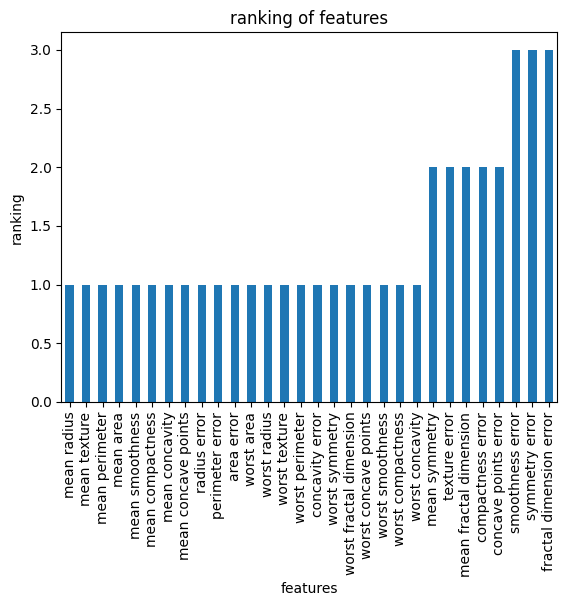

In [12]:
ranking = pd.Series(sel.ranking_, index=X_train.columns)

ranking.sort_values().plot.bar()
plt.ylabel("ranking")
plt.xlabel("features")
plt.title("ranking of features")
plt.show()